##### Clasifica las imágenes de vestimenta

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
import pandas as pd
#librerías de apoyo
import numpy as np
import matplotlib.pyplot as plt


In [2]:
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: []
Num GPUs: 0


###### 1.1.Importa el dataset fashion MNIST

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Cada imagen se asigna a una etiqueta individual. Debido a que no hay un nombre de clase para el dataset, guarda los datos como variables separadas para imprimir imágenes.
pd.Series(train_labels).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###### 1.2. Exploración de los Datos

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

###### 1.3. Preprocesado de los datos

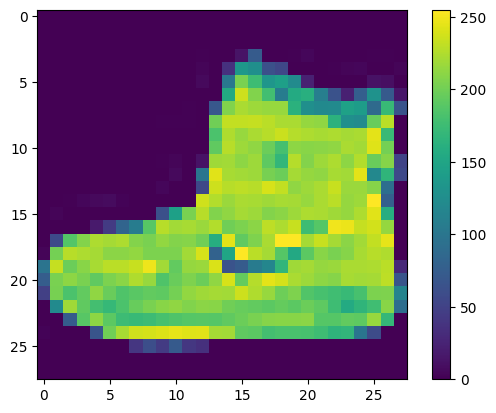

In [13]:
# La primera imagen de entrenamiento muestra que el rango de los pixeles esta entre 0~255.

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [14]:
# Antes de pasar a un modelo de red neuronal, cambia este rango a 0~1.

train_images = train_images / 255.0

test_images = test_images / 255.0

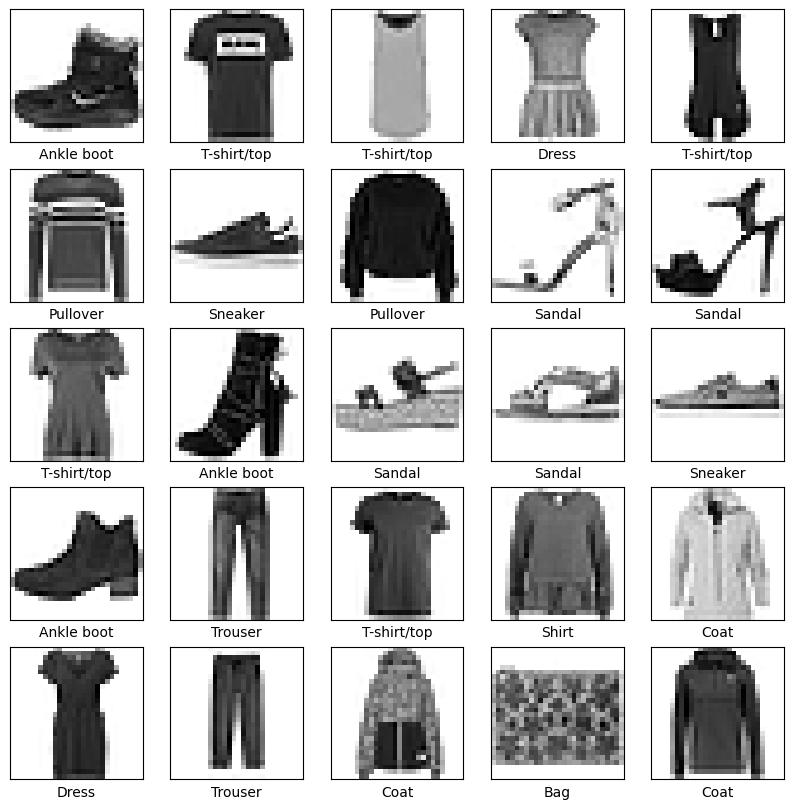

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

###### 1.4. Crea el modelo

In [17]:
# Configurar las capas
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

c:\Users\mcruz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


###### 1.5. Compila el modelo

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###### 1.6. Entrena el modelo

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7768 - loss: 0.6403
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8633 - loss: 0.3809
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8748 - loss: 0.3437
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8839 - loss: 0.3181
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8893 - loss: 0.2961
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8958 - loss: 0.2794
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9027 - loss: 0.2643
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9052 - loss: 0.2571
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9086 - loss: 0.2450
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9128 - loss: 0.2345


###### 1.7. Evalua el accuracy del modelo

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nAccuracy de la evaluación:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8853 - loss: 0.3373

Accuracy de la evaluación: 0.8852999806404114


Se encuentra que el modelo alcanza un accuracy del **88%**

###### 1.8. Predicción

In [25]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [26]:
predictions = probability_model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([6.7552014e-06, 4.2035017e-10, 3.2907970e-08, 3.8606345e-09,
       5.8347855e-09, 2.5872458e-03, 6.8962308e-08, 2.9800548e-03,
       2.6735333e-07, 9.9442554e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

El modelo predijo la etiqueta 9 para la primera imagen.

Encontramos que la primera imagen efectivamente tiene la etiqueta 9. Si volvemos a graficar, esta vez colocando los numeros de las etiquetas, encontramos que la etiqueta 9 corresponde a una bota

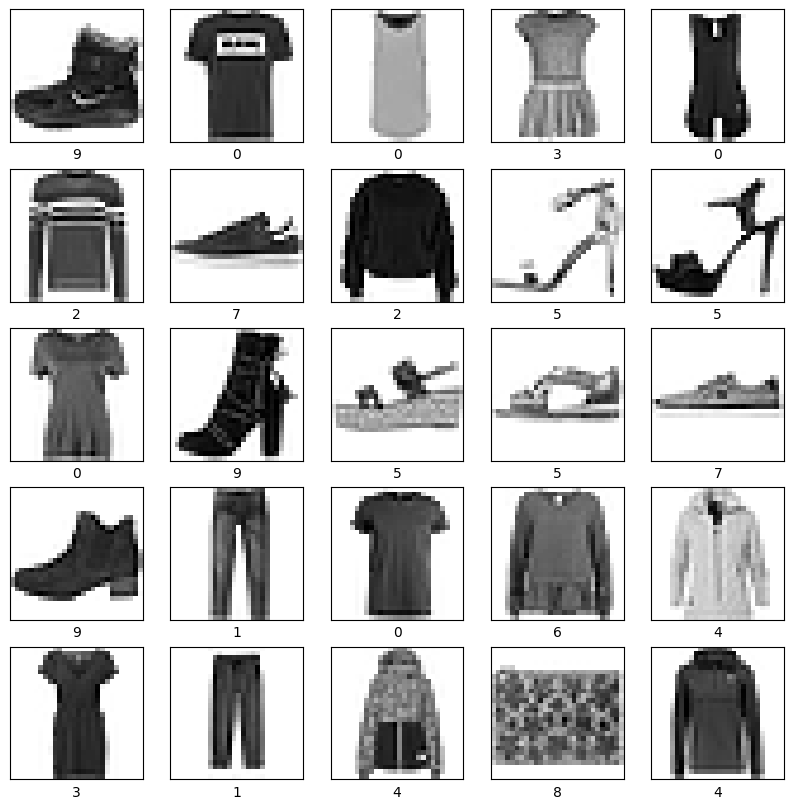

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()